In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Kaggle Dataset
data = pd.read_csv("all_stocks_5yr.csv", parse_dates = True , index_col='date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 975 entries, 2014-03-27 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    975 non-null    float64
 1   high    975 non-null    float64
 2   low     975 non-null    float64
 3   close   975 non-null    float64
 4   volume  975 non-null    int64  
 5   Name    975 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 53.3+ KB


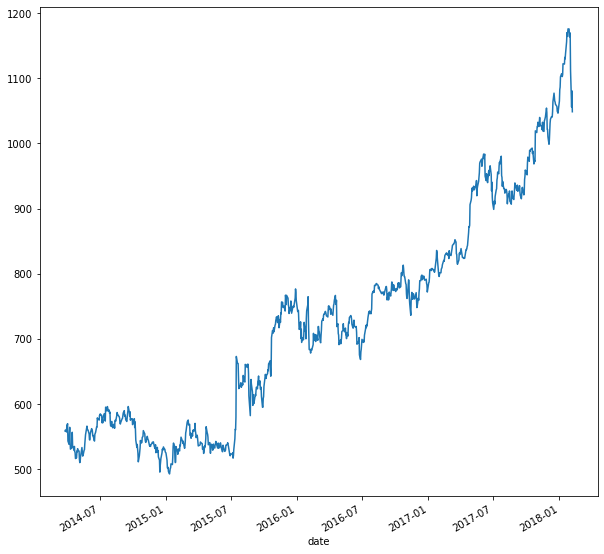

In [11]:
#Esercizio: Verificare stock split in google. Non c'è
goog = data[data['Name'] == "GOOG"]
goog.info()
goog['close'].plot(figsize = (10,10))

In [12]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


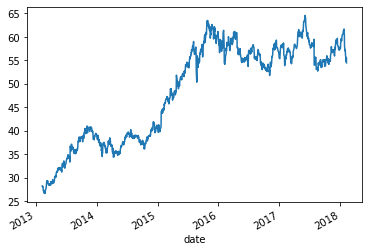

In [13]:
sbux['close'].plot()

In [18]:
#Per calcolare il return, abbiamo bisogno sia del close price corrente che
#quello precedente. Per ottenerlo usiamo:

sbux['prev_close'] = sbux['close'].shift(1)

#La funzione shift sposta di n posti in basso. Per questo, il primo sarà
#un Nan

In [20]:
sbux.head()
#Perchè facciamo lo shift dall'alto e non dal basso?
#In realtà non cambia un cazzo. Semplicemente dopo lo si chiama "next_close"

,open,high,low,close,volume,Name,prev_close
date,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [21]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [22]:
sbux.head()
#Notiamo che i return son molto piccoli. Motivo per il quale in genere
#Si lavora con i basis points.

,open,high,low,close,volume,Name,prev_close,return
date,,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [26]:
#Un altro modo è usare la percent change function:
#L'argomento è il numero di time steps su cui basiamo il change
sbux['return_pct_change'] = sbux['close'].pct_change(1)

In [27]:
sbux.head()

,open,high,low,close,volume,Name,prev_close,return,return_pct_change
date,,,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


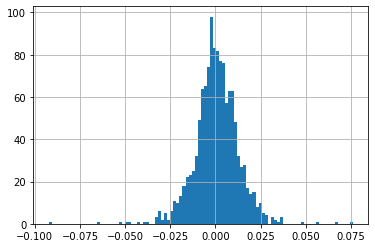

In [28]:
'''
Per ora abbiamo sempre plottato time series. Ora vorremmo capire
come sono distribuiti i return. usiamo un istogramma.
La curva è una tipica a campana. Vedremo cosa significa questo più in là
'''
sbux['return'].hist(bins=100)


In [29]:
sbux['return'].mean(), sbux['return'].std()
#Queste sono la media e la deviazione standard. In media sembra migliorare
#Ricorda che la std ha la stessa unità di misura della misura originale
#Quindi in alcuni casi è meglio della varianza

(0.0006002332205830914, 0.012360934026133879)

In [33]:
#Ora facciamo lo stesso con i log returns.
#Le operazioni di numpy si espandono all'intera struttura
#RICORDA: rt = log(Rt + 1)
sbux['log_return'] = np.log(sbux['return'] + 1)
#Exercise
sbux['log_return_mycalc'] = np.log(sbux['close']) - np.log(sbux['prev_close'])

In [37]:

'''
Possiamo notare subito una cosa: Quando x è piccola, effettivamente
abbiamo che il logaritmo approssima bene il cambiamento. Infatti abbiamo dei return
molto molto vicini
'''
sbux.head()

,open,high,low,close,volume,Name,prev_close,return,return_pct_change,log_return,log_return_mycalc
date,,,,,,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN,NaN
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089,-0.004089
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135,0.002135
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672,-0.007672
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028,-0.005028


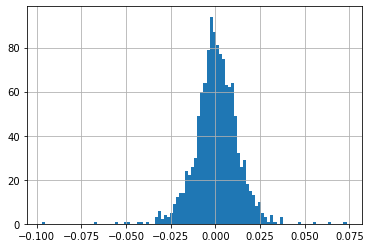

In [38]:
sbux['log_return'].hist(bins=100)

In [39]:
sbux['log_return'].mean(), sbux['log_return'].std(), sbux['log_return'].var()

(0.0005235902748108682, 0.012381234216101258, 0.00015329496071395655)

# Normal Distribution

In [40]:
from scipy.stats import norm

In [41]:
#100 punti di spazio uguale tra minimo e massimo nel valore return
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

In [46]:
# Creiamo una distribuzione normale con media nella media di return e deviazione standard idem
# x_list fornisce le coordinate x della distribuzione
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale = sbux['return'].std())

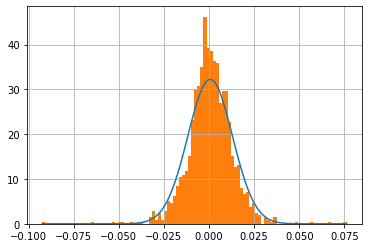

In [45]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)
#density = True: normalizza la distribuzione

In [47]:
# Notiamo che non abbiamo proprio un "good fit"
# Centro abbiamo un picco dei nostri campioni che supera la gobba della campana
# Nelle spalle, abbiamo invece una depressione
# Nelle code, notiamo anche dei valori che dovrebbero essere assenti

In [48]:
from scipy.stats import probplot

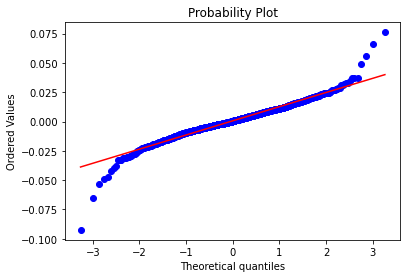

In [53]:
#Con il ; alla fine non stampiamo output array...
#Argomento1: Dati
#Argomento2: Distribuzione Teorica
#Fit=True -> Cerca i migliori parametri per la distribuzione normale per matchare i nostri dati
#plot=plt -> Diciamo la libreria (matplotlib) che usa per il plot.
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

In [57]:
#Altro modo per fare QQ plot:
import statsmodels.api as sm
#Statsmodel è scipy con steroidi ed espansioni
#E' preso da R ed ha un linguaggio statistico

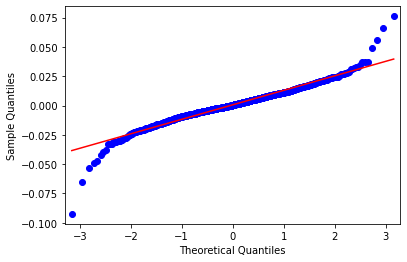

In [66]:
#line='s' significa linea standardizzata: scalata e shiftata 
#sulla distribuzione normale costruita con media e std dai dati.
# mettendo line = 'r' uso una retta di regressione
# LEGGERE LA DOCUMENTAZIONE
sm.qqplot(sbux['return'].dropna(), line='s');

In [67]:
x_list = np.linspace(sbux['log_return'].min(), 
                     sbux['log_return'].max(), 
                     100)


In [68]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale = sbux['log_return'].std())

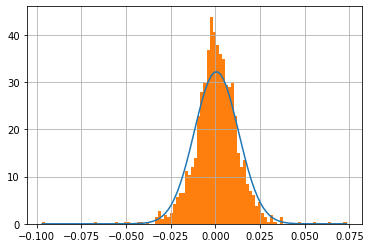

In [69]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)

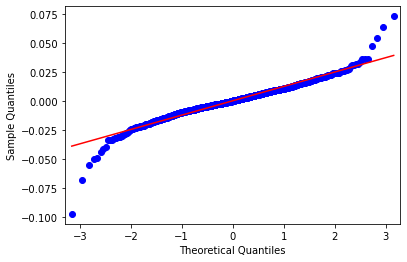

In [72]:
sm.qqplot(sbux['log_return'].dropna(), line='s');